In [93]:
# 기본적 modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family'] ='Malgun Gothic'

matplotlib.rcParams['axes.unicode_minus'] =False
import seaborn as sns

# 회귀분석 modules
import statsmodels.api as sm
from scipy.stats import skew, kurtosis
from sklearn.linear_model import LogisticRegression
from scipy.stats.mstats import winsorize
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



# 머신러닝 modules

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

# plotly 버전문제 해결 코드
import plotly.offline as pyo 
import plotly.graph_objects as go
pyo.init_notebook_mode()

# warnings 무시
import warnings
warnings.filterwarnings('ignore')

# 정상기간 데이터
## 16~18 데이터

### 16~18 외감 이자보상배율 기준 가져오기

In [2]:
# 자료 불러오기(천단위 쉼표 제거하고 정수로 불러오기)
normal_1618 = pd.read_csv('./11_13_영손(더미종합).csv', encoding='CP949')
normal_1618.head(5)

구분  총자산증가율2013  유동자산증가율2013  매출액증가율2013  매출액순이익률2013  \
0      (주)EG메탈   -0.033750     0.007592    0.490788    -0.028923   
1    (주)G1네트웍스    0.170970     0.634374   -0.041372    -0.018864   
2      (주)KH엘텍    0.415425     1.525045    2.756221     0.168835   
3  (주)SIMPAC산기    0.161903     1.168194    2.155182    -0.314684   
4        (주)가야    0.004088     0.091580   -0.112453     0.093197   

   매출원가대매출액비율2013  자기자본순이익률2013  총자산순이익률2013  매출액대판매관리비2013  매출채권회전율2013  ...  \
0        0.960242     -0.039012    -0.025247       0.039124    14.202716  ...   
1        0.882404     -0.095160    -0.023470       0.140876    11.872070  ...   
2        0.786241      0.674809     0.264764       0.050388    11.179282  ...   
3        0.958029     -0.178585    -0.101856       0.130921     3.718944  ...   
4        0.914319      0.463049     0.108646       0.054327     3.561145  ...   

   부채/매출액2013  부채/현금흐름2013  유동부채/부채2013  현금흐름/매출액2013  차입금평균금리2013  \
0    0.404217    -2.643334     0.140536     -0.152919         4.17   
1    0.605537    46.076679     0.418478      0.013142         0.30   
2    0.387485     5.935186     0.764032      0.065286         5.56   
3    1.327403    27.177484     0.912180      0.048842         4.41   
4    0.656534   159.051125     0.967189      0.004128         3.91   

   이자보상배율2013  매출  자산  업종  정상기업여부  
0    0.043679   1   1   1       1  
1  -26.817797   1   1   1       0  
2   13.747664   1   1   0       1  
3   -3.550352   0   1   0       0  
4    1.497053   1   1   0       1  

[5 rows x 32 columns]

<AxesSubplot:>

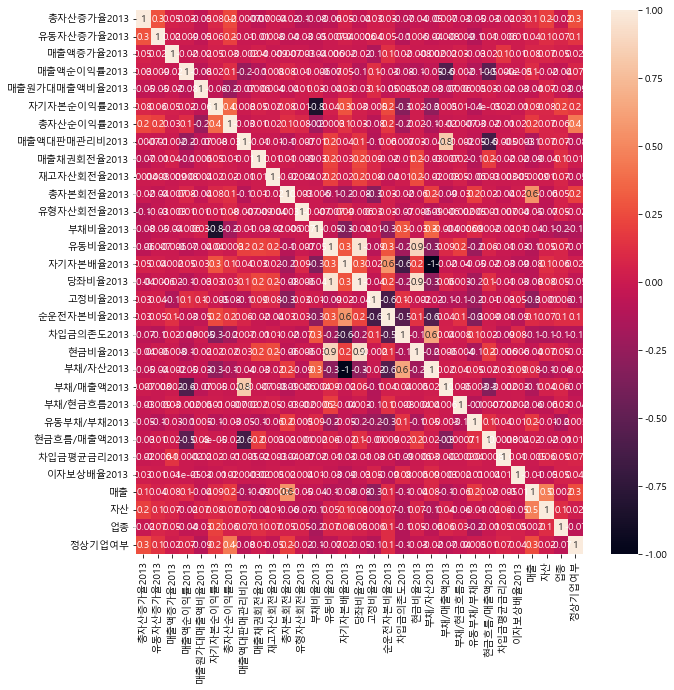

In [3]:
# 히트맵으로 시각화
corr_df = normal_1618.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_df, annot=True, fmt='.1g')

In [4]:
normal_1618.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   구분              505 non-null    object 
 1   총자산증가율2013      505 non-null    float64
 2   유동자산증가율2013     505 non-null    float64
 3   매출액증가율2013      505 non-null    float64
 4   매출액순이익률2013     505 non-null    float64
 5   매출원가대매출액비율2013  505 non-null    float64
 6   자기자본순이익률2013    505 non-null    float64
 7   총자산순이익률2013     505 non-null    float64
 8   매출액대판매관리비2013   505 non-null    float64
 9   매출채권회전율2013     505 non-null    float64
 10  재고자산회전율2013     505 non-null    float64
 11  총자본회전율2013      505 non-null    float64
 12  유형자산회전율2013     505 non-null    float64
 13  부채비율2013        505 non-null    float64
 14  유동비율2013        505 non-null    float64
 15  자기자본배율2013      505 non-null    float64
 16  당좌비율2013        505 non-null    float64
 17  고정비율2013        505 non-null    flo

In [5]:
# 빈 값 있는 지 확인
normal_1618_nasum = normal_1618.isna().sum()
normal_1618_nasum

구분                0
총자산증가율2013        0
유동자산증가율2013       0
매출액증가율2013        0
매출액순이익률2013       0
매출원가대매출액비율2013    0
자기자본순이익률2013      0
총자산순이익률2013       0
매출액대판매관리비2013     0
매출채권회전율2013       0
재고자산회전율2013       0
총자본회전율2013        0
유형자산회전율2013       0
부채비율2013          0
유동비율2013          0
자기자본배율2013        0
당좌비율2013          0
고정비율2013          0
순운전자본비율2013       0
차입금의존도2013        0
현금비율2013          0
부채/자산2013         0
부채/매출액2013        0
부채/현금흐름2013       0
유동부채/부채2013       0
현금흐름/매출액2013      0
차입금평균금리2013       0
이자보상배율2013        0
매출                0
자산                0
업종                0
정상기업여부            0
dtype: int64

In [6]:
# null값 제거한 데이터
print('### 18년 이자보상배율 기준 기업 수 비교 ###')
print(f"총 기업수 : {len(normal_1618)}")
print(f"회생기업 수 : {len(normal_1618[normal_1618['정상기업여부'] == 1])}")
print(f"미회생기업 수 : {len(normal_1618[normal_1618['정상기업여부'] == 0])}")

### 18년 이자보상배율 기준 기업 수 비교 ###
총 기업수 : 505
회생기업 수 : 177
미회생기업 수 : 328


In [7]:
# inf 값 확인

normal_1618[normal_1618.isin([np.inf, -np.inf]).any(1)]

Empty DataFrame
Columns: [구분, 총자산증가율2013, 유동자산증가율2013, 매출액증가율2013, 매출액순이익률2013, 매출원가대매출액비율2013, 자기자본순이익률2013, 총자산순이익률2013, 매출액대판매관리비2013, 매출채권회전율2013, 재고자산회전율2013, 총자본회전율2013, 유형자산회전율2013, 부채비율2013, 유동비율2013, 자기자본배율2013, 당좌비율2013, 고정비율2013, 순운전자본비율2013, 차입금의존도2013, 현금비율2013, 부채/자산2013, 부채/매출액2013, 부채/현금흐름2013, 유동부채/부채2013, 현금흐름/매출액2013, 차입금평균금리2013, 이자보상배율2013, 매출, 자산, 업종, 정상기업여부]
Index: []

[0 rows x 32 columns]

In [8]:
# inf, -inf값 삭제
normal_1618_drop = normal_1618.replace([np.inf, -np.inf], np.nan).dropna()
normal_1618_drop

구분  총자산증가율2013  유동자산증가율2013  매출액증가율2013  매출액순이익률2013  \
0        (주)EG메탈   -0.033750     0.007592    0.490788    -0.028923   
1      (주)G1네트웍스    0.170970     0.634374   -0.041372    -0.018864   
2        (주)KH엘텍    0.415425     1.525045    2.756221     0.168835   
3    (주)SIMPAC산기    0.161903     1.168194    2.155182    -0.314684   
4          (주)가야    0.004088     0.091580   -0.112453     0.093197   
..           ...         ...          ...         ...          ...   
500     현대아산주식회사   -0.002264     0.155155    0.091379    -0.081133   
501    현대종합물산(주)    0.019752     0.106532   -0.013713     0.006527   
502      홍원제지(주)   -0.043866    -0.051812   -0.111114    -0.039178   
503      화순컨트리클럽   -0.005314     0.898652    0.050091    -0.080132   
504     효창산업주식회사    0.002700     0.364470    2.113919    -0.007388   

     매출원가대매출액비율2013  자기자본순이익률2013  총자산순이익률2013  매출액대판매관리비2013  매출채권회전율2013  \
0          0.960242     -0.039012    -0.025247       0.039124    14.202716   
1          0.882404     -0.095160    -0.023470       0.140876    11.872070   
2          0.786241      0.674809     0.264764       0.050388    11.179282   
3          0.958029     -0.178585    -0.101856       0.130921     3.718944   
4          0.914319      0.463049     0.108646       0.054327     3.561145   
..              ...           ...          ...            ...          ...   
500        0.913572     -0.140603    -0.045546       0.144072     4.455844   
501        0.906101      0.006979     0.005567       0.134538     5.915732   
502        0.955231     -0.114288    -0.034933       0.069549     6.842562   
503        0.682314     -0.017899    -0.006543       0.491664   226.235485   
504        0.923055     -0.030133    -0.012261       0.065745     8.885463   

     ...  부채/매출액2013  부채/현금흐름2013  유동부채/부채2013  현금흐름/매출액2013  차입금평균금리2013  \
0    ...    0.404217    -2.643334     0.140536     -0.152919         4.17   
1    ...    0.605537    46.076679     0.418478      0.013142         0.30   
2    ...    0.387485     5.935186     0.764032      0.065286         5.56   
3    ...    1.327403    27.177484     0.912180      0.048842         4.41   
4    ...    0.656534   159.051125     0.967189      0.004128         3.91   
..   ...         ...          ...          ...           ...          ...   
500  ...    1.204288  -108.646588     0.327388     -0.011084         3.02   
501  ...    0.237239     7.304204     0.734252      0.032480         5.41   
502  ...    0.778724   -40.370556     0.838632     -0.019289         3.77   
503  ...    7.769378    82.701649     0.173649      0.093945         0.00   
504  ...    0.357369    84.090383     0.830754      0.004250         2.15   

     이자보상배율2013  매출  자산  업종  정상기업여부  
0      0.043679   1   1   1       1  
1    -26.817797   1   1   1       0  
2     13.747664   1   1   0       1  
3     -3.550352   0   1   0       0  
4      1.497053   1   1   0       1  
..          ...  ..  ..  ..     ...  
500  -43.444668   2   2   1       0  
501  -19.104074   1   1   1       0  
502   -1.081182   2   2   1       0  
503   -2.036865   1   2   1       0  
504    2.044561   1   0   1       1  

[505 rows x 32 columns]

In [9]:
# inf, -inf 삭제 후 분석 사용할 최종 데이터
print('### 18년 이자보상배율 기준 기업 수 비교 ###')
print(f"총 기업수 : {len(normal_1618_drop)}")
print(f"회생기업 수 : {len(normal_1618_drop[normal_1618_drop['정상기업여부'] == 1])}")
print(f"미회생기업 수 : {len(normal_1618_drop[normal_1618_drop['정상기업여부'] == 0])}")

### 18년 이자보상배율 기준 기업 수 비교 ###
총 기업수 : 505
회생기업 수 : 177
미회생기업 수 : 328


In [10]:
# 회사명(구분)을 index로 바꾸기
normal_1618_df = normal_1618_drop.set_index(['구분'])
normal_1618_df

총자산증가율2013  유동자산증가율2013  매출액증가율2013  매출액순이익률2013  매출원가대매출액비율2013  \
구분                                                                              
(주)EG메탈       -0.033750     0.007592    0.490788    -0.028923        0.960242   
(주)G1네트웍스      0.170970     0.634374   -0.041372    -0.018864        0.882404   
(주)KH엘텍        0.415425     1.525045    2.756221     0.168835        0.786241   
(주)SIMPAC산기    0.161903     1.168194    2.155182    -0.314684        0.958029   
(주)가야          0.004088     0.091580   -0.112453     0.093197        0.914319   
...                 ...          ...         ...          ...             ...   
현대아산주식회사      -0.002264     0.155155    0.091379    -0.081133        0.913572   
현대종합물산(주)      0.019752     0.106532   -0.013713     0.006527        0.906101   
홍원제지(주)       -0.043866    -0.051812   -0.111114    -0.039178        0.955231   
화순컨트리클럽       -0.005314     0.898652    0.050091    -0.080132        0.682314   
효창산업주식회사       0.002700     0.364470    2.113919    -0.007388        0.923055   

             자기자본순이익률2013  총자산순이익률2013  매출액대판매관리비2013  매출채권회전율2013  \
구분                                                                   
(주)EG메탈         -0.039012    -0.025247       0.039124    14.202716   
(주)G1네트웍스       -0.095160    -0.023470       0.140876    11.872070   
(주)KH엘텍          0.674809     0.264764       0.050388    11.179282   
(주)SIMPAC산기     -0.178585    -0.101856       0.130921     3.718944   
(주)가야            0.463049     0.108646       0.054327     3.561145   
...                   ...          ...            ...          ...   
현대아산주식회사        -0.140603    -0.045546       0.144072     4.455844   
현대종합물산(주)        0.006979     0.005567       0.134538     5.915732   
홍원제지(주)         -0.114288    -0.034933       0.069549     6.842562   
화순컨트리클럽         -0.017899    -0.006543       0.491664   226.235485   
효창산업주식회사        -0.030133    -0.012261       0.065745     8.885463   

             재고자산회전율2013  ...  부채/매출액2013  부채/현금흐름2013  유동부채/부채2013  \
구분                        ...                                         
(주)EG메탈         2.805940  ...    0.404217    -2.643334     0.140536   
(주)G1네트웍스      63.271474  ...    0.605537    46.076679     0.418478   
(주)KH엘텍        14.965909  ...    0.387485     5.935186     0.764032   
(주)SIMPAC산기     1.107160  ...    1.327403    27.177484     0.912180   
(주)가야           5.777743  ...    0.656534   159.051125     0.967189   
...                  ...  ...         ...          ...          ...   
현대아산주식회사       12.290477  ...    1.204288  -108.646588     0.327388   
현대종합물산(주)      14.316033  ...    0.237239     7.304204     0.734252   
홍원제지(주)         3.991149  ...    0.778724   -40.370556     0.838632   
화순컨트리클럽        57.228098  ...    7.769378    82.701649     0.173649   
효창산업주식회사      111.427440  ...    0.357369    84.090383     0.830754   

             현금흐름/매출액2013  차입금평균금리2013  이자보상배율2013  매출  자산  업종  정상기업여부  
구분                                                                      
(주)EG메탈         -0.152919         4.17    0.043679   1   1   1       1  
(주)G1네트웍스        0.013142         0.30  -26.817797   1   1   1       0  
(주)KH엘텍          0.065286         5.56   13.747664   1   1   0       1  
(주)SIMPAC산기      0.048842         4.41   -3.550352   0   1   0       0  
(주)가야            0.004128         3.91    1.497053   1   1   0       1  
...                   ...          ...         ...  ..  ..  ..     ...  
현대아산주식회사        -0.011084         3.02  -43.444668   2   2   1       0  
현대종합물산(주)        0.032480         5.41  -19.104074   1   1   1       0  
홍원제지(주)         -0.019289         3.77   -1.081182   2   2   1       0  
화순컨트리클럽          0.093945         0.00   -2.036865   1   2   1       0  
효창산업주식회사         0.004250         2.15    2.044561   1   0   1       1  

[505 rows x 31 columns]

array([[<AxesSubplot:title={'center':'총자산증가율2013'}>,
        <AxesSubplot:title={'center':'유동자산증가율2013'}>,
        <AxesSubplot:title={'center':'매출액증가율2013'}>,
        <AxesSubplot:title={'center':'매출액순이익률2013'}>,
        <AxesSubplot:title={'center':'매출원가대매출액비율2013'}>,
        <AxesSubplot:title={'center':'자기자본순이익률2013'}>],
       [<AxesSubplot:title={'center':'총자산순이익률2013'}>,
        <AxesSubplot:title={'center':'매출액대판매관리비2013'}>,
        <AxesSubplot:title={'center':'매출채권회전율2013'}>,
        <AxesSubplot:title={'center':'재고자산회전율2013'}>,
        <AxesSubplot:title={'center':'총자본회전율2013'}>,
        <AxesSubplot:title={'center':'유형자산회전율2013'}>],
       [<AxesSubplot:title={'center':'부채비율2013'}>,
        <AxesSubplot:title={'center':'유동비율2013'}>,
        <AxesSubplot:title={'center':'자기자본배율2013'}>,
        <AxesSubplot:title={'center':'당좌비율2013'}>,
        <AxesSubplot:title={'center':'고정비율2013'}>,
        <AxesSubplot:title={'center':'순운전자본비율2013'}>],
       [<AxesSubplot:title={'center

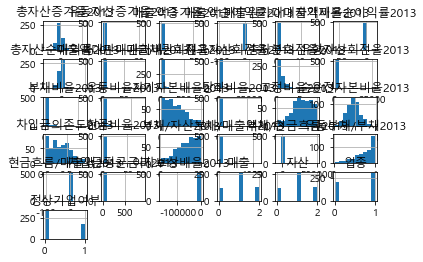

In [11]:
normal_1618_df.hist()

총자산증가율2013의 # 왜도 : 1.25  # 첨도 : 6.9
유동자산증가율2013의 # 왜도 : 13.06  # 첨도 : 194.91
매출액증가율2013의 # 왜도 : 16.81  # 첨도 : 318.54
매출액순이익률2013의 # 왜도 : -9.23  # 첨도 : 164.21
매출원가대매출액비율2013의 # 왜도 : 17.89  # 첨도 : 368.97


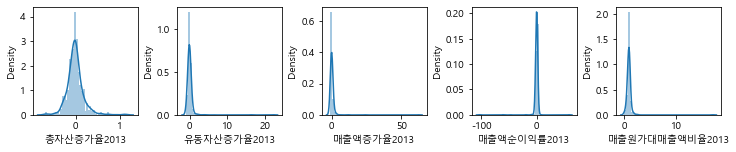

In [12]:
# distplot 분포 탐색
plt.rcParams["figure.figsize"] = (10,2)
fig, axes = plt.subplots(1,5, constrained_layout=True)

for i in range(0,5,1):
    sns.distplot(normal_1618_df.iloc[:,i], ax = axes[i])
    print(f'{normal_1618_df.columns[i]}의 # 왜도 : {np.round(skew(normal_1618_df.iloc[:,i]),2)}  # 첨도 : {np.round(kurtosis(normal_1618_df.iloc[:,i]),2)}')
plt.show()

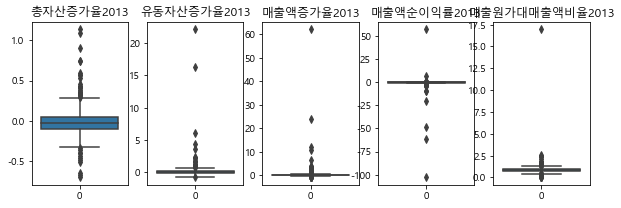

In [13]:
# 전체 박스플롯으로 이상치 탐색
plt.rcParams["figure.figsize"] = (10,3)
fig, axes = plt.subplots(1,5)

for i in range(0,5,1):
    sns.boxplot(data =(normal_1618_df).iloc[:,i], orient="v", ax = axes[i])
    axes[i].set_title(normal_1618_df.columns[i])
plt.show()

In [14]:
# 피쳐와 타겟값 분리
normal_1618_target = normal_1618_df['정상기업여부']
normal_1618_features = normal_1618_df.drop(['정상기업여부'], axis=1)
normal_1618_features

총자산증가율2013  유동자산증가율2013  매출액증가율2013  매출액순이익률2013  매출원가대매출액비율2013  \
구분                                                                              
(주)EG메탈       -0.033750     0.007592    0.490788    -0.028923        0.960242   
(주)G1네트웍스      0.170970     0.634374   -0.041372    -0.018864        0.882404   
(주)KH엘텍        0.415425     1.525045    2.756221     0.168835        0.786241   
(주)SIMPAC산기    0.161903     1.168194    2.155182    -0.314684        0.958029   
(주)가야          0.004088     0.091580   -0.112453     0.093197        0.914319   
...                 ...          ...         ...          ...             ...   
현대아산주식회사      -0.002264     0.155155    0.091379    -0.081133        0.913572   
현대종합물산(주)      0.019752     0.106532   -0.013713     0.006527        0.906101   
홍원제지(주)       -0.043866    -0.051812   -0.111114    -0.039178        0.955231   
화순컨트리클럽       -0.005314     0.898652    0.050091    -0.080132        0.682314   
효창산업주식회사       0.002700     0.364470    2.113919    -0.007388        0.923055   

             자기자본순이익률2013  총자산순이익률2013  매출액대판매관리비2013  매출채권회전율2013  \
구분                                                                   
(주)EG메탈         -0.039012    -0.025247       0.039124    14.202716   
(주)G1네트웍스       -0.095160    -0.023470       0.140876    11.872070   
(주)KH엘텍          0.674809     0.264764       0.050388    11.179282   
(주)SIMPAC산기     -0.178585    -0.101856       0.130921     3.718944   
(주)가야            0.463049     0.108646       0.054327     3.561145   
...                   ...          ...            ...          ...   
현대아산주식회사        -0.140603    -0.045546       0.144072     4.455844   
현대종합물산(주)        0.006979     0.005567       0.134538     5.915732   
홍원제지(주)         -0.114288    -0.034933       0.069549     6.842562   
화순컨트리클럽         -0.017899    -0.006543       0.491664   226.235485   
효창산업주식회사        -0.030133    -0.012261       0.065745     8.885463   

             재고자산회전율2013  ...  부채/자산2013  부채/매출액2013  부채/현금흐름2013  \
구분                        ...                                       
(주)EG메탈         2.805940  ...   0.352838    0.404217    -2.643334   
(주)G1네트웍스      63.271474  ...   0.753365    0.605537    46.076679   
(주)KH엘텍        14.965909  ...   0.607646    0.387485     5.935186   
(주)SIMPAC산기     1.107160  ...   0.429650    1.327403    27.177484   
(주)가야           5.777743  ...   0.765368    0.656534   159.051125   
...                  ...  ...        ...         ...          ...   
현대아산주식회사       12.290477  ...   0.676063    1.204288  -108.646588   
현대종합물산(주)      14.316033  ...   0.202319    0.237239     7.304204   
홍원제지(주)         3.991149  ...   0.694341    0.778724   -40.370556   
화순컨트리클럽        57.228098  ...   0.634429    7.769378    82.701649   
효창산업주식회사      111.427440  ...   0.593108    0.357369    84.090383   

             유동부채/부채2013  현금흐름/매출액2013  차입금평균금리2013  이자보상배율2013  매출  자산  업종  
구분                                                                           
(주)EG메탈         0.140536     -0.152919         4.17    0.043679   1   1   1  
(주)G1네트웍스       0.418478      0.013142         0.30  -26.817797   1   1   1  
(주)KH엘텍         0.764032      0.065286         5.56   13.747664   1   1   0  
(주)SIMPAC산기     0.912180      0.048842         4.41   -3.550352   0   1   0  
(주)가야           0.967189      0.004128         3.91    1.497053   1   1   0  
...                  ...           ...          ...         ...  ..  ..  ..  
현대아산주식회사        0.327388     -0.011084         3.02  -43.444668   2   2   1  
현대종합물산(주)       0.734252      0.032480         5.41  -19.104074   1   1   1  
홍원제지(주)         0.838632     -0.019289         3.77   -1.081182   2   2   1  
화순컨트리클럽         0.173649      0.093945         0.00   -2.036865   1   2   1  
효창산업주식회사        0.830754      0.004250         2.15    2.044561   1   0   1  

[505 rows x 30 columns]

In [15]:
# 윈저라이징 후 다시 데이터 프레임 변환

normal_1618_win = []
for i in range(len(normal_1618_features.columns)):
  dt = winsorize(normal_1618_features.iloc[:,i], limits=[0.005, 0.005])
  normal_1618_win.append(np.ma.getdata(dt))
  # print(normal_1618_win)

normal_1618_win_df = pd.DataFrame(data=normal_1618_win, index=normal_1618_features.columns, columns=normal_1618_features.index).transpose()
normal_1618_win_df

총자산증가율2013  유동자산증가율2013  매출액증가율2013  매출액순이익률2013  매출원가대매출액비율2013  \
구분                                                                              
(주)EG메탈       -0.033750     0.007592    0.490788    -0.028923        0.960242   
(주)G1네트웍스      0.170970     0.634374   -0.041372    -0.018864        0.882404   
(주)KH엘텍        0.415425     1.525045    2.756221     0.168835        0.786241   
(주)SIMPAC산기    0.161903     1.168194    2.155182    -0.314684        0.958029   
(주)가야          0.004088     0.091580   -0.112453     0.093197        0.914319   
...                 ...          ...         ...          ...             ...   
현대아산주식회사      -0.002264     0.155155    0.091379    -0.081133        0.913572   
현대종합물산(주)      0.019752     0.106532   -0.013713     0.006527        0.906101   
홍원제지(주)       -0.043866    -0.051812   -0.111114    -0.039178        0.955231   
화순컨트리클럽       -0.005314     0.898652    0.050091    -0.080132        0.682314   
효창산업주식회사       0.002700     0.364470    2.113919    -0.007388        0.923055   

             자기자본순이익률2013  총자산순이익률2013  매출액대판매관리비2013  매출채권회전율2013  \
구분                                                                   
(주)EG메탈         -0.039012    -0.025247       0.039124    14.202716   
(주)G1네트웍스       -0.095160    -0.023470       0.140876    11.872070   
(주)KH엘텍          0.674809     0.264764       0.050388    11.179282   
(주)SIMPAC산기     -0.178585    -0.101856       0.130921     3.718944   
(주)가야            0.463049     0.108646       0.054327     3.561145   
...                   ...          ...            ...          ...   
현대아산주식회사        -0.140603    -0.045546       0.144072     4.455844   
현대종합물산(주)        0.006979     0.005567       0.134538     5.915732   
홍원제지(주)         -0.114288    -0.034933       0.069549     6.842562   
화순컨트리클럽         -0.017899    -0.006543       0.491664   226.235485   
효창산업주식회사        -0.030133    -0.012261       0.065745     8.885463   

             재고자산회전율2013  ...  부채/자산2013  부채/매출액2013  부채/현금흐름2013  \
구분                        ...                                       
(주)EG메탈         2.805940  ...   0.352838    0.404217    -2.643334   
(주)G1네트웍스      63.271474  ...   0.753365    0.605537    46.076679   
(주)KH엘텍        14.965909  ...   0.607646    0.387485     5.935186   
(주)SIMPAC산기     1.107160  ...   0.429650    1.327403    27.177484   
(주)가야           5.777743  ...   0.765368    0.656534   159.051125   
...                  ...  ...        ...         ...          ...   
현대아산주식회사       12.290477  ...   0.676063    1.204288  -108.646588   
현대종합물산(주)      14.316033  ...   0.202319    0.237239     7.304204   
홍원제지(주)         3.991149  ...   0.694341    0.778724   -40.370556   
화순컨트리클럽        57.228098  ...   0.634429    7.769378    82.701649   
효창산업주식회사      111.427440  ...   0.593108    0.357369    84.090383   

             유동부채/부채2013  현금흐름/매출액2013  차입금평균금리2013  이자보상배율2013   매출   자산   업종  
구분                                                                              
(주)EG메탈         0.140536     -0.152919         4.17    0.043679  1.0  1.0  1.0  
(주)G1네트웍스       0.418478      0.013142         0.30  -26.817797  1.0  1.0  1.0  
(주)KH엘텍         0.764032      0.065286         5.56   13.747664  1.0  1.0  0.0  
(주)SIMPAC산기     0.912180      0.048842         4.41   -3.550352  0.0  1.0  0.0  
(주)가야           0.967189      0.004128         3.91    1.497053  1.0  1.0  0.0  
...                  ...           ...          ...         ...  ...  ...  ...  
현대아산주식회사        0.327388     -0.011084         3.02  -43.444668  2.0  2.0  1.0  
현대종합물산(주)       0.734252      0.032480         5.41  -19.104074  1.0  1.0  1.0  
홍원제지(주)         0.838632     -0.019289         3.77   -1.081182  2.0  2.0  1.0  
화순컨트리클럽         0.173649      0.093945         0.00   -2.036865  1.0  2.0  1.0  
효창산업주식회사        0.830754      0.004250         2.15    2.044561  1.0  0.0  1.0  

[505 rows x 30 columns]

In [16]:
normal_1618_target

구분
(주)EG메탈        1
(주)G1네트웍스      0
(주)KH엘텍        1
(주)SIMPAC산기    0
(주)가야          1
              ..
현대아산주식회사       0
현대종합물산(주)      0
홍원제지(주)        0
화순컨트리클럽        0
효창산업주식회사       1
Name: 정상기업여부, Length: 505, dtype: int64

array([[<AxesSubplot:title={'center':'총자산증가율2013'}>,
        <AxesSubplot:title={'center':'유동자산증가율2013'}>,
        <AxesSubplot:title={'center':'매출액증가율2013'}>,
        <AxesSubplot:title={'center':'매출액순이익률2013'}>,
        <AxesSubplot:title={'center':'매출원가대매출액비율2013'}>],
       [<AxesSubplot:title={'center':'자기자본순이익률2013'}>,
        <AxesSubplot:title={'center':'총자산순이익률2013'}>,
        <AxesSubplot:title={'center':'매출액대판매관리비2013'}>,
        <AxesSubplot:title={'center':'매출채권회전율2013'}>,
        <AxesSubplot:title={'center':'재고자산회전율2013'}>],
       [<AxesSubplot:title={'center':'총자본회전율2013'}>,
        <AxesSubplot:title={'center':'유형자산회전율2013'}>,
        <AxesSubplot:title={'center':'부채비율2013'}>,
        <AxesSubplot:title={'center':'유동비율2013'}>,
        <AxesSubplot:title={'center':'자기자본배율2013'}>],
       [<AxesSubplot:title={'center':'당좌비율2013'}>,
        <AxesSubplot:title={'center':'고정비율2013'}>,
        <AxesSubplot:title={'center':'순운전자본비율2013'}>,
        <AxesSubplot:title={'center

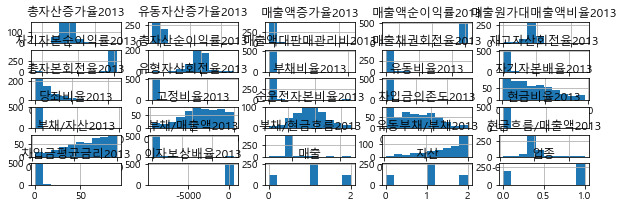

In [17]:
normal_1618_win_df.hist()

총자산증가율2013의 # 왜도 : 1.0  # 첨도 : 4.9
유동자산증가율2013의 # 왜도 : 6.13  # 첨도 : 50.19
매출액증가율2013의 # 왜도 : 7.27  # 첨도 : 62.79
매출액순이익률2013의 # 왜도 : -11.48  # 첨도 : 136.46
매출원가대매출액비율2013의 # 왜도 : 1.03  # 첨도 : 6.82


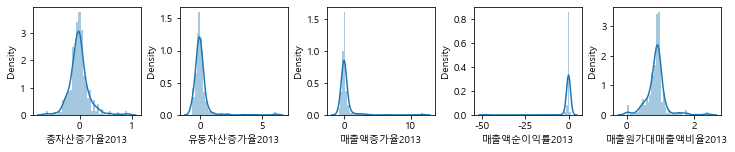

In [18]:
# distplot 분포 탐색
plt.rcParams["figure.figsize"] = (10,2)
fig, axes = plt.subplots(1,5, constrained_layout=True)

for i in range(0,5,1):
    sns.distplot(normal_1618_win_df.iloc[:,i], ax = axes[i])
    print(f'{normal_1618_win_df.columns[i]}의 # 왜도 : {np.round(skew(normal_1618_win_df.iloc[:,i]),2)}  # 첨도 : {np.round(kurtosis(normal_1618_win_df.iloc[:,i]),2)}')
plt.show()

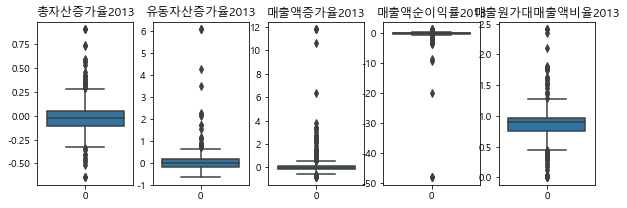

In [19]:
# 전체 박스플롯으로 이상치 탐색
plt.rcParams["figure.figsize"] = (10,3)
fig, axes = plt.subplots(1,5)

for i in range(0,5,1):
    sns.boxplot(data =(normal_1618_win_df).iloc[:,i], orient="v", ax = axes[i])
    axes[i].set_title(normal_1618_win_df.columns[i])
plt.show()

In [20]:
normal_1618_target

구분
(주)EG메탈        1
(주)G1네트웍스      0
(주)KH엘텍        1
(주)SIMPAC산기    0
(주)가야          1
              ..
현대아산주식회사       0
현대종합물산(주)      0
홍원제지(주)        0
화순컨트리클럽        0
효창산업주식회사       1
Name: 정상기업여부, Length: 505, dtype: int64

In [21]:
normal_1618_win

[array([-3.37499200e-02,  1.70970494e-01,  4.15424654e-01,  1.61903107e-01,
         4.08804319e-03,  4.08804319e-03,  4.08804319e-03,  4.08804319e-03,
        -2.64101545e-02, -1.00285685e-01,  3.34768910e-02,  2.46494730e-01,
        -6.25432867e-02, -1.59327918e-01,  3.26936311e-01,  3.26936311e-01,
         3.26936311e-01,  3.26936311e-01,  1.93082897e-01, -2.27205914e-01,
        -1.30241223e-01,  4.26536099e-01,  3.80192780e-02, -6.67364219e-02,
        -7.26733134e-02,  2.14731834e-02, -1.58301104e-02,  3.98815734e-02,
        -4.16204494e-02, -1.05998181e-01, -2.45715469e-01,  7.86822643e-02,
        -2.68291258e-02, -2.81686060e-02, -1.70166236e-01, -2.78193903e-01,
         1.88101680e-01,  1.25259279e-01, -1.59013269e-02, -3.04024988e-01,
        -3.04024988e-01, -3.04024988e-01, -3.04024988e-01, -5.38205130e-02,
        -2.00248063e-02, -1.31341306e-01, -3.14392998e-02, -1.89813447e-01,
        -6.37242574e-02, -8.41661047e-02, -2.58224881e-03,  6.14450423e-02,
        -1.5

#### 이자보상배율 빼주기

In [22]:
normal_1618_win_df1 = normal_1618_win_df.drop(['이자보상배율2013'], axis=1)
normal_1618_win_df2 = normal_1618_win_df1.drop(['부채/자산2013'], axis=1)

In [23]:
normal_1618_win_df2.corr()

총자산증가율2013  유동자산증가율2013  매출액증가율2013  매출액순이익률2013  \
총자산증가율2013        1.000000     0.372043    0.098337     0.045198   
유동자산증가율2013       0.372043     1.000000    0.053772     0.022006   
매출액증가율2013        0.098337     0.053772    1.000000    -0.027140   
매출액순이익률2013       0.045198     0.022006   -0.027140     1.000000   
매출원가대매출액비율2013   -0.088485    -0.110036   -0.108635     0.102364   
자기자본순이익률2013      0.105089     0.104169    0.103018     0.021956   
총자산순이익률2013       0.293907     0.267446    0.102558     0.161627   
매출액대판매관리비2013    -0.003704    -0.019535    0.028822    -0.651638   
매출채권회전율2013      -0.062751    -0.002380    0.037585    -0.196970   
재고자산회전율2013       0.008054     0.040143   -0.025468     0.021090   
총자본회전율2013       -0.008348    -0.042628    0.014149     0.131163   
유형자산회전율2013      -0.067166    -0.039979    0.097706     0.019042   
부채비율2013         -0.107945    -0.094894   -0.095738    -0.007627   
유동비율2013         -0.080344    -0.027550   -0.003190    -0.211976   
자기자본배율2013        0.053087     0.052880    0.041000    -0.019728   
당좌비율2013         -0.049236    -0.017266   -0.035693    -0.202284   
고정비율2013          0.024373     0.032539   -0.152712     0.110245   
순운전자본비율2013       0.035448     0.063938    0.152041    -0.063671   
차입금의존도2013       -0.068900    -0.118642   -0.045385    -0.046924   
현금비율2013         -0.069754     0.002454   -0.030819    -0.281922   
부채/매출액2013        0.010745    -0.009503    0.022682    -0.640599   
부채/현금흐름2013      -0.049123    -0.031275    0.078743     0.002310   
유동부채/부채2013      -0.054737    -0.084661    0.001147    -0.085445   
현금흐름/매출액2013      0.123518     0.313673    0.133338    -0.169219   
차입금평균금리2013       0.018502     0.011548    0.217766    -0.003193   
매출                0.112070     0.038568    0.081549     0.175322   
자산                0.203131     0.120124    0.097156    -0.075729   
업종               -0.010921     0.081963    0.074674    -0.069620   

                매출원가대매출액비율2013  자기자본순이익률2013  총자산순이익률2013  매출액대판매관리비2013  \
총자산증가율2013           -0.088485      0.105089     0.293907      -0.003704   
유동자산증가율2013          -0.110036      0.104169     0.267446      -0.019535   
매출액증가율2013           -0.108635      0.103018     0.102558       0.028822   
매출액순이익률2013           0.102364      0.021956     0.161627      -0.651638   
매출원가대매출액비율2013        1.000000     -0.174003    -0.259491      -0.236570   
자기자본순이익률2013         -0.174003      1.000000     0.354654       0.005358   
총자산순이익률2013          -0.259491      0.354654     1.000000      -0.048914   
매출액대판매관리비2013        -0.236570      0.005358    -0.048914       1.000000   
매출채권회전율2013          -0.140001      0.055320     0.013339      -0.006056   
재고자산회전율2013           0.030730      0.031817     0.026569      -0.019484   
총자본회전율2013           -0.006093      0.090511     0.139578      -0.113635   
유형자산회전율2013           0.023465      0.026214     0.054427      -0.016128   
부채비율2013              0.154924     -0.917339    -0.258485      -0.012259   
유동비율2013             -0.094952      0.050468    -0.003314       0.244439   
자기자본배율2013           -0.052186      0.293949     0.159900       0.017930   
당좌비율2013             -0.053204      0.052285     0.054240       0.237268   
고정비율2013              0.106146      0.008279    -0.067910      -0.126034   
순운전자본비율2013          -0.107501      0.246074     0.168914       0.063696   
차입금의존도2013            0.071511     -0.337108    -0.203489       0.036133   
현금비율2013             -0.068359      0.038133     0.023330       0.057389   
부채/매출액2013           -0.216141     -0.001264    -0.042117       0.980917   
부채/현금흐름2013           0.023778      0.030386     0.055372      -0.001240   
유동부채/부채2013           0.005282     -0.109011    -0.045857      -0.019793   
현금흐름/매출액2013         -0.093258      0.184430     0.166878      -0.061298   
차입금평균금리2013          -0.047734      0.037431    -0.082745      -0.009339   
매출                    0.027612      0.097266     0.193068      -0.1

In [24]:
# statsmodels의 logit 분석을 위해 X 변수 생성
X = normal_1618_win_df2.reset_index(drop=True)
y = normal_1618_target.reset_index(drop=True)

# y 변수 배열 조정
y = np.array(y).reshape(-1,1)
y.shape

print(X)
print(X.shape)
print(y.shape)

     총자산증가율2013  유동자산증가율2013  매출액증가율2013  매출액순이익률2013  매출원가대매출액비율2013  \
0     -0.033750     0.007592    0.490788    -0.028923        0.960242   
1      0.170970     0.634374   -0.041372    -0.018864        0.882404   
2      0.415425     1.525045    2.756221     0.168835        0.786241   
3      0.161903     1.168194    2.155182    -0.314684        0.958029   
4      0.004088     0.091580   -0.112453     0.093197        0.914319   
..          ...          ...         ...          ...             ...   
500   -0.002264     0.155155    0.091379    -0.081133        0.913572   
501    0.019752     0.106532   -0.013713     0.006527        0.906101   
502   -0.043866    -0.051812   -0.111114    -0.039178        0.955231   
503   -0.005314     0.898652    0.050091    -0.080132        0.682314   
504    0.002700     0.364470    2.113919    -0.007388        0.923055   

     자기자본순이익률2013  총자산순이익률2013  매출액대판매관리비2013  매출채권회전율2013  재고자산회전율2013  ...  \
0       -0.039012    -0.025247       0.0391

In [25]:
# 19차 로지스틱 분석
X1 = normal_1618_win_df2.reset_index(drop=True).drop(['매출원가대매출액비율2013','매출액대판매관리비2013','자기자본순이익률2013'],axis=1)
# 상수항 추가
X1 = sm.add_constant(X1)

model = sm.GLM(y, X1, family=sm.families.Binomial())
results = model.fit(atol=1e-10)
print(results.summary())
print(f'AIC Score : {results.aic:.4f}')
print(results.pvalues[results.pvalues==max(results.pvalues.drop('const',axis=0))])
print(results.pvalues.index[abs(results.params)>2])

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  505
Model:                            GLM   Df Residuals:                      479
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -189.55
Date:                Wed, 06 Jul 2022   Deviance:                       379.10
Time:                        01:22:36   Pearson chi2:                 1.60e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.4201
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -2.3482      2.245     -1.046   

In [26]:
X1 = normal_1618_win_df2.reset_index(drop=True)[['매출원가대매출액비율2013','매출액대판매관리비2013','자기자본순이익률2013','총자산증가율2013','총자산순이익률2013','자기자본배율2013','고정비율2013','순운전자본비율2013','유동부채/부채2013','현금흐름/매출액2013']]
X = sm.add_constant(X1)

model = sm.GLM(y, X, family=sm.families.Binomial())
results = model.fit(atol=1e-10)
print(results.summary())
print(f'AIC Score : {results.aic:.4f}')
print(results.pvalues[results.pvalues==max(results.pvalues.drop('const',axis=0))])
print(results.pvalues[abs(results.params)>2])

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  505
Model:                            GLM   Df Residuals:                      494
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 06 Jul 2022   Deviance:                       12434.
Time:                        01:22:36   Pearson chi2:                 6.08e+17
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           8.276e+14   3.74e+07   2.21e

# 매출액대 판관비 먼저 고려

In [27]:
X1 = normal_1618_win_df2.reset_index(drop=True)[['매출액대판매관리비2013','자기자본순이익률2013','총자산증가율2013','총자산순이익률2013','자기자본배율2013','고정비율2013','순운전자본비율2013','유동부채/부채2013','현금흐름/매출액2013']]
X = sm.add_constant(X1)

model = sm.GLM(y, X, family=sm.families.Binomial())
results = model.fit(atol=1e-10)
print(results.summary())
print(f'AIC Score : {results.aic:.4f}')
print(results.pvalues[results.pvalues==max(results.pvalues.drop('const',axis=0))])

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  505
Model:                            GLM   Df Residuals:                      495
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -198.47
Date:                Wed, 06 Jul 2022   Deviance:                       396.95
Time:                        01:22:36   Pearson chi2:                 2.45e+03
No. Iterations:                    10   Pseudo R-squ. (CS):             0.3992
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.1736      1.783     -0.658

In [28]:
X1 = normal_1618_win_df2.reset_index(drop=True)[['매출액대판매관리비2013','자기자본순이익률2013','총자산증가율2013','총자산순이익률2013','자기자본배율2013','순운전자본비율2013','유동부채/부채2013','현금흐름/매출액2013']]
X = sm.add_constant(X1)

model = sm.GLM(y, X, family=sm.families.Binomial())
results = model.fit(atol=1e-10)
print(results.summary())
print(f'AIC Score : {results.aic:.4f}')
print(results.pvalues[results.pvalues==max(results.pvalues.drop('const',axis=0))])

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  505
Model:                            GLM   Df Residuals:                      496
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -199.36
Date:                Wed, 06 Jul 2022   Deviance:                       398.71
Time:                        01:22:37   Pearson chi2:                 2.63e+03
No. Iterations:                    10   Pseudo R-squ. (CS):             0.3971
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.0337      0.491      2.106

In [29]:
X1 = normal_1618_win_df2.reset_index(drop=True)[['매출액대판매관리비2013','자기자본순이익률2013','총자산증가율2013','총자산순이익률2013','자기자본배율2013','순운전자본비율2013','현금흐름/매출액2013']]
X = sm.add_constant(X1)

model = sm.GLM(y, X, family=sm.families.Binomial())
results = model.fit(atol=1e-10)
print(results.summary())
print(f'AIC Score : {results.aic:.4f}')
print(results.pvalues[results.pvalues==max(results.pvalues.drop('const',axis=0))])

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  505
Model:                            GLM   Df Residuals:                      497
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -199.50
Date:                Wed, 06 Jul 2022   Deviance:                       399.00
Time:                        01:22:37   Pearson chi2:                 2.61e+03
No. Iterations:                    10   Pseudo R-squ. (CS):             0.3967
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.2324      0.322      3.822

In [30]:
X1 = normal_1618_win_df2.reset_index(drop=True)[['매출액대판매관리비2013','자기자본순이익률2013','총자산증가율2013','총자산순이익률2013','자기자본배율2013','현금흐름/매출액2013']]
X = sm.add_constant(X1)

model = sm.GLM(y, X, family=sm.families.Binomial())
results = model.fit(atol=1e-10)
print(results.summary())
print(f'AIC Score : {results.aic:.4f}')
print(results.pvalues[results.pvalues==max(results.pvalues.drop('const',axis=0))])

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  505
Model:                            GLM   Df Residuals:                      498
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -200.26
Date:                Wed, 06 Jul 2022   Deviance:                       400.51
Time:                        01:22:37   Pearson chi2:                 2.74e+03
No. Iterations:                    10   Pseudo R-squ. (CS):             0.3949
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.0718      0.292      3.677

In [43]:
X1 = normal_1618_win_df2.reset_index(drop=True)[['매출액대판매관리비2013','자기자본순이익률2013','총자산증가율2013','총자산순이익률2013','자기자본배율2013']]
X = sm.add_constant(X1)

model = sm.GLM(y, X, family=sm.families.Binomial())
results = model.fit(atol=1e-10)
print(results.summary())
print(f'AIC Score : {results.aic:.4f}')
print(results.pvalues[results.pvalues==max(results.pvalues.drop('const',axis=0))])

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  505
Model:                            GLM   Df Residuals:                      499
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -201.18
Date:                Wed, 06 Jul 2022   Deviance:                       402.36
Time:                        09:52:31   Pearson chi2:                 2.48e+03
No. Iterations:                    10   Pseudo R-squ. (CS):             0.3927
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.0574      0.290      3.648

In [44]:
# 로지스틱 분석 

# 상수항 추가
p_v = 10
# 변수선언, 10이 아니여도 0.05보다 큰 값이면 상관 없습니다.

while float(0.05) < float(p_v):
    # p값이 0.05보다 크면 계속 변수가 1개씩 제거되는 반복문 코드입니다.
    X = sm.add_constant(X)

    model = sm.GLM(y, X, family=sm.families.Binomial())
    results = model.fit(atol=1e-10)
    p_v = results.pvalues[results.pvalues==max(results.pvalues.drop('const',axis=0))]
    # 여기서 p값이 가장 큰 변수가 지정됩니다.
    
    if len(p_v) == 1:
        if float(0.05) < float(p_v):  
            X.drop(p_v.index,axis=1,inplace=True)
        # p값이 가장 큰 인덱스 값을 지정하여 해당 열을 제거합니다.   
        print(results.pvalues[results.pvalues==max(results.pvalues.drop('const',axis=0))])
        print(f'AIC Score : {results.aic:.4f}')
    
    else:
        t_v = results.tvalues[results.tvalues == min(abs(results.tvalues.drop('const',axis=0)))]
        X.drop(t_v.index,axis=1,inplace=True)
        print(results.tvalues[results.tvalues==max(results.tvalues.drop('const',axis=0))])
        print(f'AIC Score : {results.aic:.4f}')
    # 이때, 지워지는 변수의 이름과 p값을 표시합니다.

print(results.summary())
# 모든 불필요한 변수가 제거된 이후 최종 모델에 대한 summary 입니다.
print(f'AIC Score : {results.aic:.4f}')
print(results.pvalues[results.pvalues==max(results.pvalues.drop('const',axis=0))])

자기자본순이익률2013    0.02926
dtype: float64
AIC Score : 414.3640
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  505
Model:                            GLM   Df Residuals:                      499
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -201.18
Date:                Wed, 06 Jul 2022   Deviance:                       402.36
Time:                        09:52:34   Pearson chi2:                 2.48e+03
No. Iterations:                    10   Pseudo R-squ. (CS):             0.3927
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------

## 이런 식으로 p값 기준 가장 높은 변수들부터 삭제 해 주세요

### p값 삭제가 끝났다면 이제 자기상관 분석

In [33]:
# 상관성 분석
corr_df = X.corr()

<AxesSubplot:>

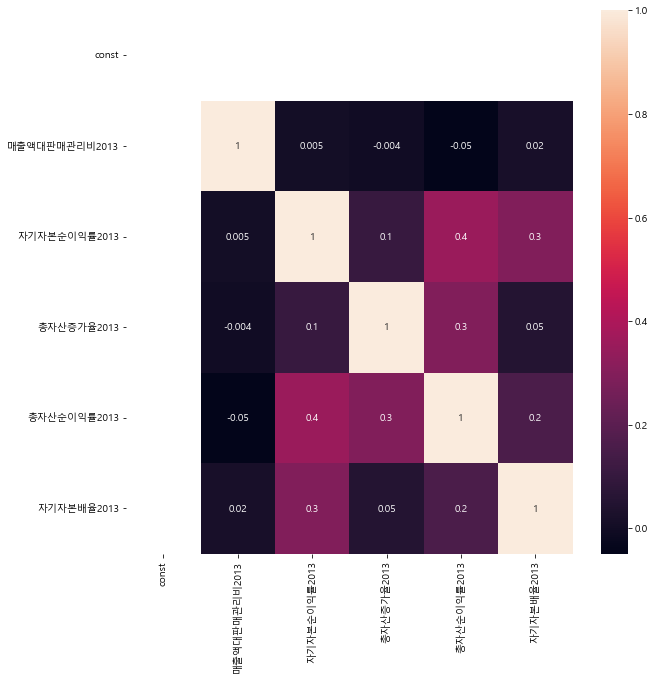

In [34]:
# 히트맵으로 시각화
plt.figure(figsize=(10,10))
sns.heatmap(corr_df, annot=True, fmt='.1g')

In [52]:
X.drop('const',axis=1,inplace=True)

### 상관분석은 일단 찍어만 봐주세요 빼야할지는 나중에 결정

### 변수선정은 이제 끝입니다. 여기부턴 모델링 해보는 과정

In [65]:
# 트레인, 테스트 셋 분리

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

In [66]:
# GridSearchCV를 통한 로지스틱 회귀의 최적 하이퍼 파라미터 찾기
lg_clf = LogisticRegression(random_state=9)

params = {'penalty' : ['l2', 'l1', 'elasticnet'], 'C':[0.001, 0.01, 0.1, 1, 5, 10, 100], 'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

grid_clf = GridSearchCV(lg_clf, param_grid=params, scoring='accuracy', cv=7)
grid_clf1 = GridSearchCV(lg_clf, param_grid=params, scoring='f1', cv=7)
grid_clf.fit(X, y)
grid_clf1.fit(X, y)
print(f'최적 하이퍼 파라미터 : {grid_clf.best_params_}, 최적 평균 정확도 : {np.round(grid_clf.best_score_,4)}')
print(f'최적 하이퍼 파라미터 : {grid_clf1.best_params_}, 최적 평균 F1스코어 : {np.round(grid_clf1.best_score_,4)}')

최적 하이퍼 파라미터 : {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}, 최적 평균 정확도 : 0.8415
최적 하이퍼 파라미터 : {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}, 최적 평균 F1스코어 : 0.7707


In [107]:
# 파라미터 튜닝 후 다시 로지스틱

lg_clf = LogisticRegression(C=0.01, penalty='l1', random_state=9, solver='liblinear')
lg_clf.fit(X_train,y_train)
y_pred = lg_clf.predict(X_test)

acc_score = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('### Logistic Regression 분류 결과 ###')
print(f'ACC : {acc_score:.4f}')
print(f'Precision : {precision:.4f}')
print(f'Recall : {recall:.4f}')
print(f'F1 Score : {f1:.4f}')

### Logistic Regression 분류 결과 ###
ACC : 0.8515
Precision : 0.7568
Recall : 0.8235
F1 Score : 0.7887


자기자본순이익률2013     0.080818
매출액대판매관리비2013    0.000000
총자산증가율2013       0.000000
총자산순이익률2013      0.000000
자기자본배율2013       0.000000
dtype: float64


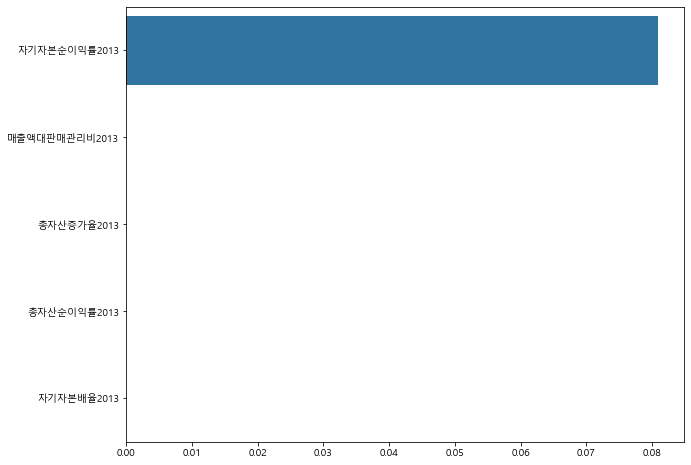

In [108]:
# 로지스틱 방식 사용시 회귀 트리의 COEF 파악
plt.rcParams["figure.figsize"] = (10,8)
feature_series = pd.Series(data = lg_clf.coef_[0], index=X_train.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)
print(feature_series)


샘플 추출을 위한 임곗값 배열의 index :  [ 1  6 11 16 21 26]
샘플 index로 추출한 임곗값 :  [0.53 0.5  0.5  0.5  0.5  0.5 ]
샘플 임곗값별 FPR :  [0.    0.03  0.06  0.134 0.299 0.507]
샘플 임곗값별 TPR :  [0.029 0.324 0.559 0.853 0.912 1.   ]
ROC_AUC Score : 0.8446


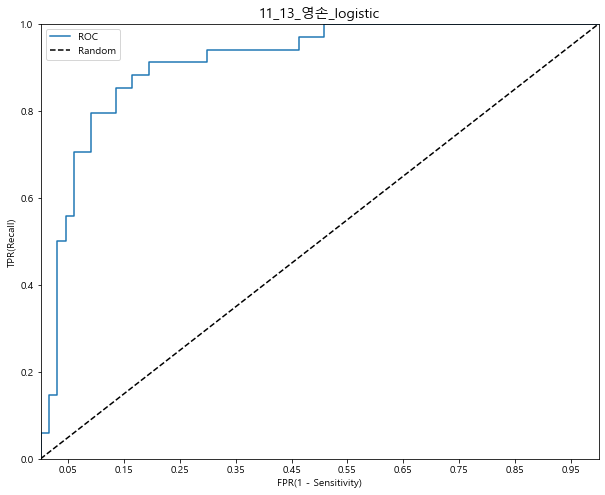

In [109]:
pred_proba_class1 = lg_clf.predict_proba(X_test)[:,1]
# lg_clf 부분은 모델마다 해당 모델을 지정하는 변수를 적으면 됩니다.

roc_auc = roc_auc_score(y_test,y_pred)

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임계값 배열에서 샘플로 데이터를 추출하되, 임곗값을 5 step으로 추출
# thresholds[0]은 max(예측확률) + 1로 임의 설정된다.
# 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index : ', thr_index)
print('샘플 index로 추출한 임곗값 : ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임곗값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR : ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR : ', np.round(tprs[thr_index], 3))

def roc_curve_plot(y_test, pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    # ROC 곡선 그래프 곡선으로 그림
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선을 그림
    plt.plot([0,1],[0,1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X, Y 축 명 설정 등
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1); plt.ylim(0, 1)
    plt.xlabel('FPR(1 - Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.title('11_13_영손_logistic',fontdict={'fontsize':14})
    # 여기에 '기간_기업분류기준(ex:영손,이자)_모델이름'이런 식으로 작성해 주세요.
    
roc_curve_plot(y_test, pred_proba_class1)
print(f'ROC_AUC Score : {roc_auc:.4f}')
# 주의!! SVM에서는 모델 작성 시, probability=True 라는 값을 입력해야 roc-auc curve를 작성할 수 있다.

In [39]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train,y_train)
y_pred = xgb_clf.predict(X_test)

params =  {'n_estimators' : [10,100,1000], 'learning_rate':[0.01,0.1,0.5], 'max_depth' : [3,4,5,6], 'min_child_weight' : [1,2], 'gamma' : [0,1,2]}



grid_tree = GridSearchCV(xgb_clf, param_grid=params, cv=7, refit=True,scoring='f1')
grid_tree.fit(X, y)

print('best parameters : ', grid_tree.best_params_)
print('best score : ', grid_tree.best_score_)



best parameters :  {'gamma': 2, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 2, 'n_estimators': 100}
best score :  0.8215604714978813


In [110]:

xgb_clf = XGBClassifier(gamma=2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=100)
xgb_clf.fit(X_train,y_train)
y_pred = xgb_clf.predict(X_test)

acc_score = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('### XGB Classifier 분류 결과 ###')
print(f'ACC : {acc_score:.4f}')
print(f'Precision : {precision:.4f}')
print(f'Recall : {recall:.4f}')
print(f'f1 : {f1:.4f}')

### XGB Classifier 분류 결과 ###
ACC : 0.8911
Precision : 0.8286
Recall : 0.8529
f1 : 0.8406


Index([], dtype='object')


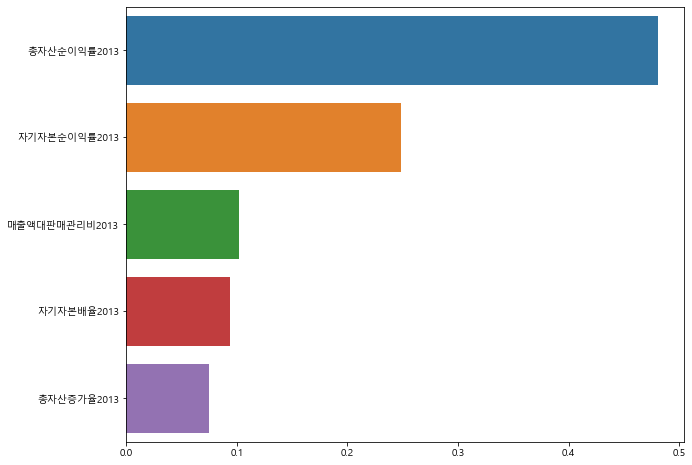

In [111]:
# XGB 방식 사용시 회귀 트리의 피쳐 중요도 파악
plt.rcParams["figure.figsize"] = (10,8)
feature_series = pd.Series(data = xgb_clf.feature_importances_, index=X_train.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)
print(feature_series.index[feature_series<=0.01])

샘플 추출을 위한 임곗값 배열의 index :  [ 1  6 11 16 21 26 31]
샘플 index로 추출한 임곗값 :  [0.94 0.85 0.72 0.62 0.2  0.06 0.02]
샘플 임곗값별 FPR :  [0.    0.03  0.06  0.09  0.134 0.313 0.507]
샘플 임곗값별 TPR :  [0.029 0.294 0.588 0.735 0.941 1.    1.   ]
ROC_AUC Score : 0.8817


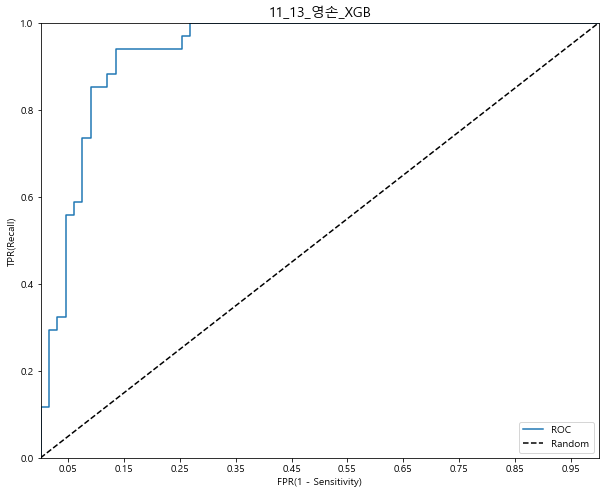

In [112]:
pred_proba_class1 = xgb_clf.predict_proba(X_test)[:,1]
# lg_clf 부분은 모델마다 해당 모델을 지정하는 변수를 적으면 됩니다.

roc_auc = roc_auc_score(y_test,y_pred)

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임계값 배열에서 샘플로 데이터를 추출하되, 임곗값을 5 step으로 추출
# thresholds[0]은 max(예측확률) + 1로 임의 설정된다.
# 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index : ', thr_index)
print('샘플 index로 추출한 임곗값 : ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임곗값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR : ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR : ', np.round(tprs[thr_index], 3))

def roc_curve_plot(y_test, pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    # ROC 곡선 그래프 곡선으로 그림
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선을 그림
    plt.plot([0,1],[0,1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X, Y 축 명 설정 등
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1); plt.ylim(0, 1)
    plt.xlabel('FPR(1 - Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.title('11_13_영손_XGB',fontdict={'fontsize':14})
    # 여기에 '기간_기업분류기준(ex:영손,이자)_모델이름'이런 식으로 작성해 주세요.
    
roc_curve_plot(y_test, pred_proba_class1)
print(f'ROC_AUC Score : {roc_auc:.4f}')
# 주의!! SVM에서는 모델 작성 시, probability=True 라는 값을 입력해야 roc-auc curve를 작성할 수 있다.

# Decision tree

In [69]:
# GridSearchCV를 통한 회귀나무의 회귀의 최적 하이퍼 파라미터 찾기
dt_clf = DecisionTreeClassifier(random_state=9)

params = {'max_depth' : [2,3,4,5,6,7,8], 'min_samples_split':[1,2,3,4,5], 'max_features' : ['auto', 'sqrt', 'log2']}

grid_clf = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=7)
grid_clf1 = GridSearchCV(dt_clf, param_grid=params, scoring='f1', cv=7)
grid_clf.fit(X,y)
grid_clf1.fit(X,y)
print(f'최적 하이퍼 파라미터 : {grid_clf.best_params_}, 최적 평균 정확도 : {np.round(grid_clf.best_score_,4)}')
print(f'최적 하이퍼 파라미터 : {grid_clf1.best_params_}, 최적 평균 F1스코어 : {np.round(grid_clf1.best_score_,4)}')

최적 하이퍼 파라미터 : {'max_depth': 2, 'max_features': 'auto', 'min_samples_split': 2}, 최적 평균 정확도 : 0.8613
최적 하이퍼 파라미터 : {'max_depth': 2, 'max_features': 'auto', 'min_samples_split': 2}, 최적 평균 F1스코어 : 0.818


In [116]:
# 파라미터 튜닝 후 다시 회귀나무

dt_clf = DecisionTreeClassifier(max_depth=2, max_features='auto', min_samples_split=2, random_state=9)
dt_clf.fit(X_train,y_train)
y_pred = dt_clf.predict(X_test)

acc_score = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('### Decision classifier 분류 결과 ###')
print(f'ACC : {acc_score:.4f}')
print(f'Precision : {precision:.4f}')
print(f'Recall : {recall:.4f}')
print(f'F1 Score : {f1:.4f}')

### Decision classifier 분류 결과 ###
ACC : 0.8911
Precision : 0.7949
Recall : 0.9118
F1 Score : 0.8493


샘플 추출을 위한 임곗값 배열의 index :  [1]
샘플 index로 추출한 임곗값 :  [0.76]
샘플 임곗값별 FPR :  [0.119]
샘플 임곗값별 TPR :  [0.912]
ROC_AUC Score : 0.8962


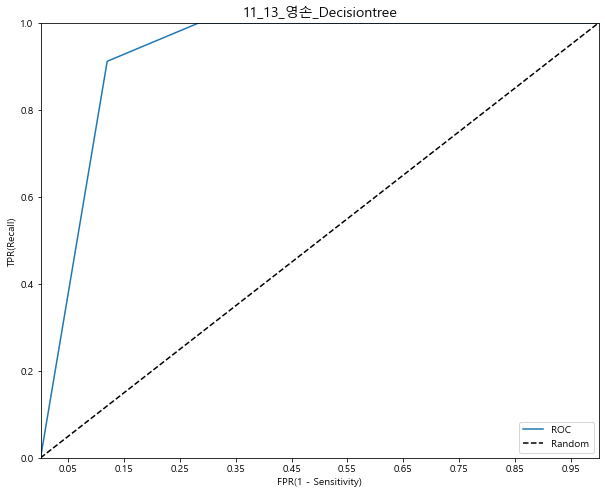

In [117]:
pred_proba_class1 = dt_clf.predict_proba(X_test)[:,1]
# lg_clf 부분은 모델마다 해당 모델을 지정하는 변수를 적으면 됩니다.

roc_auc = roc_auc_score(y_test,y_pred)

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임계값 배열에서 샘플로 데이터를 추출하되, 임곗값을 5 step으로 추출
# thresholds[0]은 max(예측확률) + 1로 임의 설정된다.
# 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index : ', thr_index)
print('샘플 index로 추출한 임곗값 : ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임곗값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR : ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR : ', np.round(tprs[thr_index], 3))

def roc_curve_plot(y_test, pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    # ROC 곡선 그래프 곡선으로 그림
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선을 그림
    plt.plot([0,1],[0,1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X, Y 축 명 설정 등
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1); plt.ylim(0, 1)
    plt.xlabel('FPR(1 - Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.title('11_13_영손_Decisiontree',fontdict={'fontsize':14})
    # 여기에 '기간_기업분류기준(ex:영손,이자)_모델이름'이런 식으로 작성해 주세요.
    
roc_curve_plot(y_test, pred_proba_class1)
print(f'ROC_AUC Score : {roc_auc:.4f}')
# 주의!! SVM에서는 모델 작성 시, probability=True 라는 값을 입력해야 roc-auc curve를 작성할 수 있다.

In [71]:
# GridSearchCV를 통한 RF의 최적 하이퍼 파라미터 찾기
rf_clf = RandomForestClassifier(random_state=9)

# params = {'n_estimators' : [10,100,500,1000,10000], 'min_samples_leaf':[1,2,3,4,5], 'max_features' : ['auto', 'sqrt', 'log2'], 'criterion' : ['gini', 'entropy', 'log_loss']}
params = {'n_estimators' : [10,100,1000], 'min_samples_leaf':[2,3,4]}
grid_clf = GridSearchCV(rf_clf, param_grid=params, scoring='accuracy', cv=7)
grid_clf1 = GridSearchCV(rf_clf, param_grid=params, scoring='f1', cv=7)
grid_clf.fit(X,y)
grid_clf1.fit(X,y)
print(f'최적 하이퍼 파라미터 : {grid_clf.best_params_}, 최적 평균 정확도 : {np.round(grid_clf.best_score_,4)}')
print(f'최적 하이퍼 파라미터 : {grid_clf1.best_params_}, 최적 평균 F1스코어 : {np.round(grid_clf1.best_score_,4)}')

최적 하이퍼 파라미터 : {'min_samples_leaf': 3, 'n_estimators': 100}, 최적 평균 정확도 : 0.8653
최적 하이퍼 파라미터 : {'min_samples_leaf': 3, 'n_estimators': 100}, 최적 평균 F1스코어 : 0.8172


In [118]:
# 파라미터 튜닝 후 다시 회귀나무

rf_clf = RandomForestClassifier(n_estimators=10, min_samples_leaf=3, random_state=9)
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_test)

acc_score = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('### RandomForest classifier 분류 결과 ###')
print(f'ACC : {acc_score:.4f}')
print(f'Precision : {precision:.4f}')
print(f'Recall : {recall:.4f}')
print(f'F1 Score : {f1:.4f}')

### RandomForest classifier 분류 결과 ###
ACC : 0.8614
Precision : 0.7941
Recall : 0.7941
F1 Score : 0.7941


샘플 추출을 위한 임곗값 배열의 index :  [ 1  6 11 16 21 26 31]
샘플 index로 추출한 임곗값 :  [1.   0.81 0.55 0.29 0.16 0.04 0.  ]
샘플 임곗값별 FPR :  [0.015 0.045 0.104 0.134 0.239 0.403 1.   ]
샘플 임곗값별 TPR :  [0.088 0.353 0.735 0.882 0.941 0.971 1.   ]
ROC_AUC Score : 0.8448


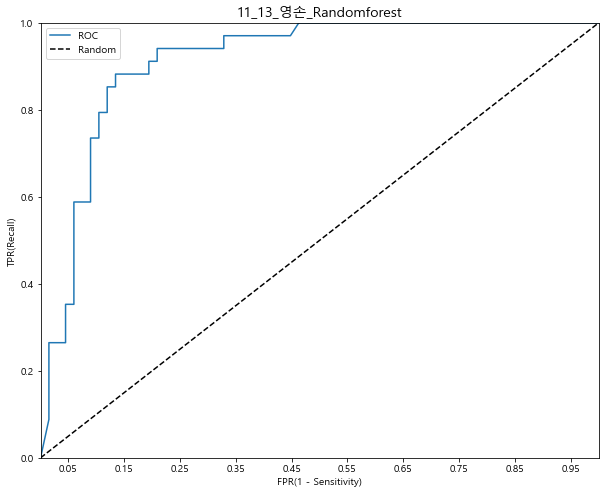

In [119]:
pred_proba_class1 = rf_clf.predict_proba(X_test)[:,1]
# lg_clf 부분은 모델마다 해당 모델을 지정하는 변수를 적으면 됩니다.

roc_auc = roc_auc_score(y_test,y_pred)

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임계값 배열에서 샘플로 데이터를 추출하되, 임곗값을 5 step으로 추출
# thresholds[0]은 max(예측확률) + 1로 임의 설정된다.
# 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index : ', thr_index)
print('샘플 index로 추출한 임곗값 : ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임곗값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR : ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR : ', np.round(tprs[thr_index], 3))

def roc_curve_plot(y_test, pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    # ROC 곡선 그래프 곡선으로 그림
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선을 그림
    plt.plot([0,1],[0,1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X, Y 축 명 설정 등
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1); plt.ylim(0, 1)
    plt.xlabel('FPR(1 - Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.title('11_13_영손_Randomforest',fontdict={'fontsize':14})
    # 여기에 '기간_기업분류기준(ex:영손,이자)_모델이름'이런 식으로 작성해 주세요.
    
roc_curve_plot(y_test, pred_proba_class1)
print(f'ROC_AUC Score : {roc_auc:.4f}')
# 주의!! SVM에서는 모델 작성 시, probability=True 라는 값을 입력해야 roc-auc curve를 작성할 수 있다.

In [73]:
# GridSearchCV를 통한 SVM의 최적 하이퍼 파라미터 찾기
from sklearn import svm

svm_clf = svm.SVC(random_state=9)

# params = {'n_estimators' : [10,100,500,1000,10000], 'min_samples_leaf':[1,2,3,4,5], 'max_features' : ['auto', 'sqrt', 'log2'], 'criterion' : ['gini', 'entropy', 'log_loss']}
params = {'C' : [1, 10, 100], 'kernel' : ['linear', 'poly', 'rbf'],  'gamma' : [0.001, 0.01, 0.1]}
grid_clf = GridSearchCV(svm_clf, param_grid=params, scoring='accuracy', cv=7)
grid_clf1 = GridSearchCV(svm_clf, param_grid=params, scoring='f1', cv=7)
grid_clf.fit(X,y)
grid_clf1.fit(X,y)
print(f'최적 하이퍼 파라미터 : {grid_clf.best_params_}, 최적 평균 정확도 : {np.round(grid_clf.best_score_,4)}')
print(f'최적 하이퍼 파라미터 : {grid_clf1.best_params_}, 최적 평균 F1스코어 : {np.round(grid_clf1.best_score_,4)}')

최적 하이퍼 파라미터 : {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}, 최적 평균 정확도 : 0.8515
최적 하이퍼 파라미터 : {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}, 최적 평균 F1스코어 : 0.7921


In [104]:
# SVM 모델링
from sklearn import svm

svm_clf  = svm.SVC(random_state=9, C=100, gamma=0.1,kernel='rbf',probability=True)
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)

acc_score = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('### SVM classifier 분류 결과 ###')
print(f'ACC : {acc_score:.4f}')
print(f'Precision : {precision:.4f}')
print(f'Recall : {recall:.4f}')
print(f'F1 Score : {f1:.4f}')

### SVM classifier 분류 결과 ###
ACC : 0.8416
Precision : 0.7647
Recall : 0.7647
F1 Score : 0.7647


샘플 추출을 위한 임곗값 배열의 index :  [ 1  6 11 16 21 26]
샘플 index로 추출한 임곗값 :  [1.   0.7  0.56 0.31 0.2  0.  ]
샘플 임곗값별 FPR :  [0.    0.06  0.09  0.239 0.284 0.94 ]
샘플 임곗값별 TPR :  [0.029 0.441 0.765 0.853 0.971 1.   ]
ROC_AUC Score : 0.8448


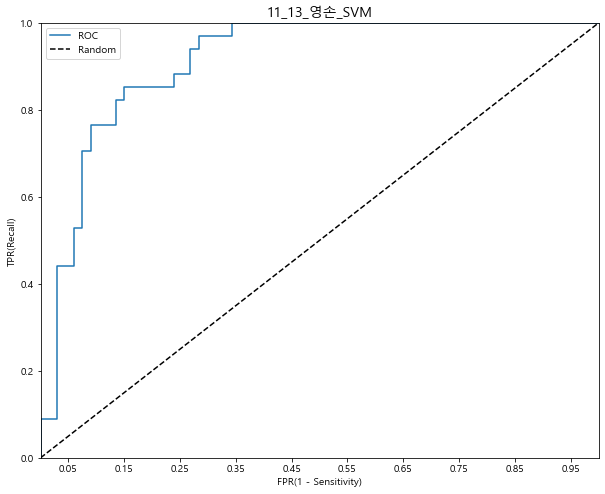

In [120]:
pred_proba_class1 = svm_clf.predict_proba(X_test)[:,1]
# lg_clf 부분은 모델마다 해당 모델을 지정하는 변수를 적으면 됩니다.

roc_auc = roc_auc_score(y_test,y_pred)

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임계값 배열에서 샘플로 데이터를 추출하되, 임곗값을 5 step으로 추출
# thresholds[0]은 max(예측확률) + 1로 임의 설정된다.
# 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index : ', thr_index)
print('샘플 index로 추출한 임곗값 : ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임곗값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR : ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR : ', np.round(tprs[thr_index], 3))

def roc_curve_plot(y_test, pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    # ROC 곡선 그래프 곡선으로 그림
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선을 그림
    plt.plot([0,1],[0,1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X, Y 축 명 설정 등
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1); plt.ylim(0, 1)
    plt.xlabel('FPR(1 - Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.title('11_13_영손_SVM',fontdict={'fontsize':14})
    # 여기에 '기간_기업분류기준(ex:영손,이자)_모델이름'이런 식으로 작성해 주세요.
    
roc_curve_plot(y_test, pred_proba_class1)
print(f'ROC_AUC Score : {roc_auc:.4f}')
# 주의!! SVM에서는 모델 작성 시, probability=True 라는 값을 입력해야 roc-auc curve를 작성할 수 있다.

In [76]:
from sklearn.neighbors import KNeighborsClassifier

# GridSearchCV를 통한 kNN의 최적 하이퍼 파라미터 찾기

knn_clf = KNeighborsClassifier()

# params = {'n_estimators' : [10,100,500,1000,10000], 'min_samples_leaf':[1,2,3,4,5], 'max_features' : ['auto', 'sqrt', 'log2'], 'criterion' : ['gini', 'entropy', 'log_loss']}
params = {'n_neighbors' : [3, 4, 5, 6], 'p': [1,2], 'weights' : ['uniform', 'distance'] }
grid_clf = GridSearchCV(knn_clf, param_grid=params, scoring='accuracy', cv=7)
grid_clf1 = GridSearchCV(knn_clf, param_grid=params, scoring='f1', cv=7)
grid_clf.fit(X,y)
grid_clf1.fit(X,y)
print(f'최적 하이퍼 파라미터 : {grid_clf.best_params_}, 최적 평균 정확도 : {np.round(grid_clf.best_score_,4)}')
print(f'최적 하이퍼 파라미터 : {grid_clf1.best_params_}, 최적 평균 F1스코어 : {np.round(grid_clf1.best_score_,4)}')

최적 하이퍼 파라미터 : {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}, 최적 평균 정확도 : 0.8436
최적 하이퍼 파라미터 : {'n_neighbors': 6, 'p': 1, 'weights': 'distance'}, 최적 평균 F1스코어 : 0.7927


In [121]:

knn_clf = KNeighborsClassifier(n_neighbors=6, p = 1, weights='distance')
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)

acc_score = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('### kNN classifier 분류 결과 ###')
print(f'ACC : {acc_score:.4f}')
print(f'Precision : {precision:.4f}')
print(f'Recall : {recall:.4f}')
print(f'F1 Score : {f1:.4f}')

### kNN classifier 분류 결과 ###
ACC : 0.8713
Precision : 0.8182
Recall : 0.7941
F1 Score : 0.8060


샘플 추출을 위한 임곗값 배열의 index :  [ 1  6 11 16]
샘플 index로 추출한 임곗값 :  [1.   0.34 0.15 0.  ]
샘플 임곗값별 FPR :  [0.06  0.09  0.269 1.   ]
샘플 임곗값별 TPR :  [0.324 0.882 0.941 1.   ]
ROC_AUC Score : 0.8523


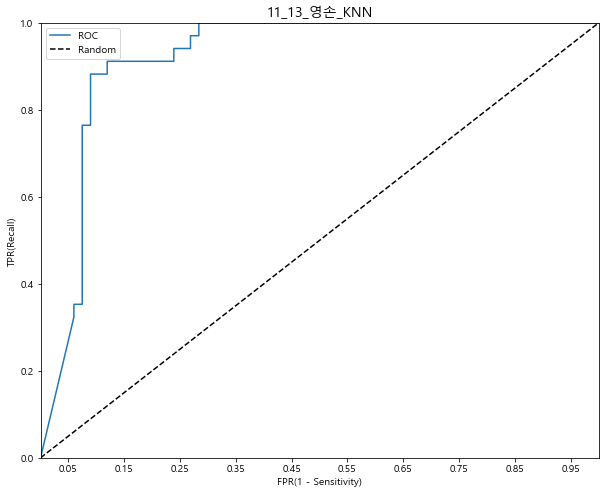

In [122]:
pred_proba_class1 = knn_clf.predict_proba(X_test)[:,1]
# lg_clf 부분은 모델마다 해당 모델을 지정하는 변수를 적으면 됩니다.

roc_auc = roc_auc_score(y_test,y_pred)

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임계값 배열에서 샘플로 데이터를 추출하되, 임곗값을 5 step으로 추출
# thresholds[0]은 max(예측확률) + 1로 임의 설정된다.
# 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index : ', thr_index)
print('샘플 index로 추출한 임곗값 : ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임곗값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR : ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR : ', np.round(tprs[thr_index], 3))

def roc_curve_plot(y_test, pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    # ROC 곡선 그래프 곡선으로 그림
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선을 그림
    plt.plot([0,1],[0,1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X, Y 축 명 설정 등
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1); plt.ylim(0, 1)
    plt.xlabel('FPR(1 - Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.title('11_13_영손_KNN',fontdict={'fontsize':14})
    # 여기에 '기간_기업분류기준(ex:영손,이자)_모델이름'이런 식으로 작성해 주세요.
    
roc_curve_plot(y_test, pred_proba_class1)
print(f'ROC_AUC Score : {roc_auc:.4f}')
# 주의!! SVM에서는 모델 작성 시, probability=True 라는 값을 입력해야 roc-auc curve를 작성할 수 있다.